this is yolo v8 code:

In [ ]:
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [ ]:
!kaggle datasets download -d safurahajiheidari/kidney-stone-images

100% 21.1M/21.1M [00:00<00:00, 111MB/s] 
100% 21.1M/21.1M [00:00<00:00, 106MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/kidney-stone-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


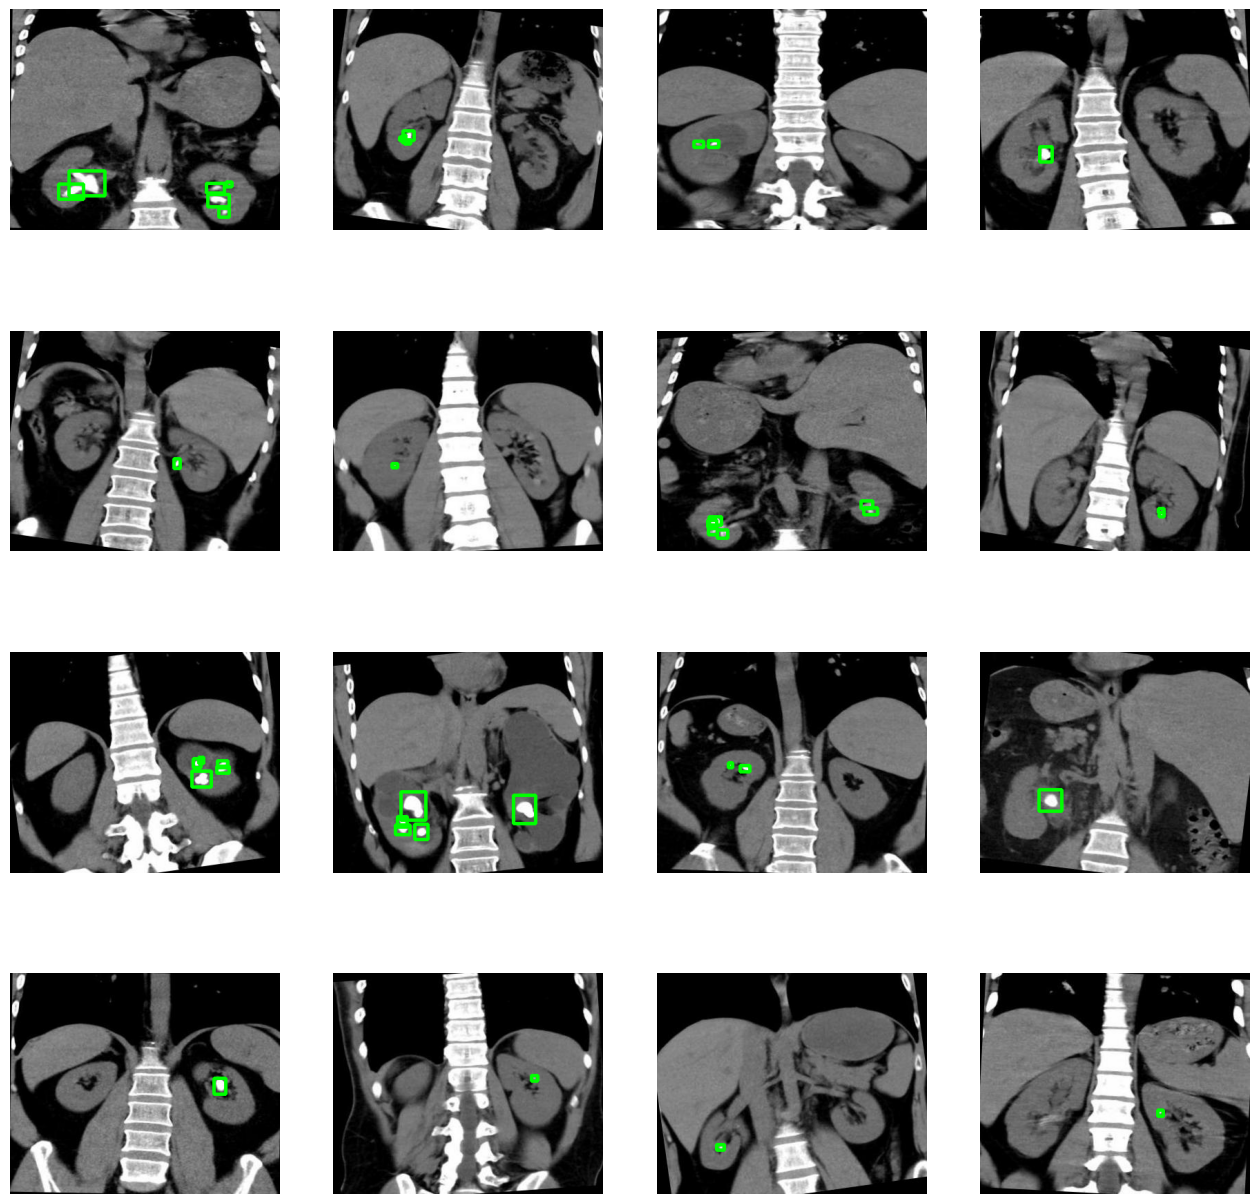

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/train/images"
train_labels = "/content/train/labels"

test_images = "/content/test/images"
test_labels = "/content/test/labels"

val_images = "/content/valid/images"
val_labels = "/content/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:01<00:00, 97.9MB/s]


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# Training the model
model.train(data = '/content/data.yaml',
            seed = 42,
            epochs = 50,
            lr0=0.001)

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 50.4MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<00:00, 1217.85it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 848.82it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.5G      2.366       3.42      1.425         41        640: 100%|██████████| 66/66 [01:18<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        14G      2.278      1.604      1.386         39        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        14G      2.324      1.652      1.395         47        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        123        325     0.0874     0.0123    0.00535    0.00245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        14G      2.231      1.508      1.355         33        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        123        325      0.208     0.0677     0.0403     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        14G      2.169      1.282      1.358         49        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        325      0.603      0.508      0.506       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        14G      2.174      1.298      1.319         51        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        123        325      0.675      0.578      0.533      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G      2.127      1.195      1.313         61        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.649      0.471      0.492      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        14G      2.117      1.216      1.316         37        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325      0.644      0.595       0.62      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        14G      2.128      1.167      1.294         28        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.695      0.628       0.61      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        14G      2.054      1.138      1.278         26        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.694      0.591      0.588      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        14G      2.114      1.122      1.297         54        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        325      0.651      0.585      0.595      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        14G      2.035      1.087      1.238         52        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.738      0.589      0.618      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        14G      2.056      1.111      1.264         43        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325      0.731      0.631      0.663      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        14G      1.997      1.025      1.248         41        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        325      0.696      0.622      0.599      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        14G      2.024      1.084      1.274         46        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        123        325      0.763        0.6      0.626      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        14G      2.004       1.05      1.237         57        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325       0.76      0.628       0.64      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        14G      2.011      1.051      1.255         54        640: 100%|██████████| 66/66 [01:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325       0.76      0.643      0.635      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        14G      1.993       1.02      1.237         35        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        325      0.771      0.649      0.684      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G      2.032      1.016      1.235         85        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.766      0.695      0.721      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G      1.999      1.052      1.256         39        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.756      0.655      0.689      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G      1.974      1.005      1.248         41        640: 100%|██████████| 66/66 [01:16<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        123        325       0.79      0.649      0.679      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        14G      1.934     0.9678      1.198         47        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325      0.752      0.609      0.652      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G      1.969      1.009      1.221         50        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.786      0.668        0.7      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        14G      1.945     0.9847      1.223         34        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.763      0.685      0.722      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G      1.928     0.9605      1.216         46        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325       0.77      0.662      0.682      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        14G      1.911     0.9666      1.234         31        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.752      0.652      0.723       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        14G      1.905     0.9546        1.2         38        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.789      0.689      0.723      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        14G      1.939     0.9539      1.195         32        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.818      0.702      0.742      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        14G      1.938     0.9926      1.227         50        640: 100%|██████████| 66/66 [01:18<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325        0.8       0.69      0.747      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        14G      1.882     0.9359      1.196         36        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        123        325      0.789      0.714       0.75      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        14G      1.899     0.9402      1.188         45        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.791      0.695      0.724       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G      1.881     0.9195      1.192         49        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.788      0.695      0.733      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        14G      1.844     0.8971      1.175         57        640: 100%|██████████| 66/66 [01:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.758      0.655      0.721      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        14G       1.87     0.9215      1.189         42        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        123        325      0.741      0.726      0.758      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        14G      1.822     0.8899      1.164         36        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        325      0.755      0.732       0.76      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        14G       1.84     0.8908      1.166         52        640: 100%|██████████| 66/66 [01:16<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        325      0.787      0.705       0.73      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        14G      1.803     0.8735      1.142         49        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        123        325      0.818      0.708      0.741      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        14G       1.77     0.8552      1.173         41        640: 100%|██████████| 66/66 [01:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        123        325      0.843      0.676      0.754      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        14G      1.851     0.8804      1.156         47        640: 100%|██████████| 66/66 [01:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        123        325      0.808      0.717      0.752      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        14G      1.817     0.8639      1.144         47        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        325      0.816      0.708      0.736      0.282


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        14G      1.796     0.8603        1.2         20        640: 100%|██████████| 66/66 [01:18<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        325      0.796      0.695      0.754      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        14G      1.781     0.8563      1.197         28        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        325      0.799      0.702      0.759      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        14G      1.768      0.835      1.168         32        640: 100%|██████████| 66/66 [01:16<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        325      0.787      0.705      0.706      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        14G      1.765     0.8236      1.166         27        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.764      0.729      0.745      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        14G      1.737      0.819      1.165         26        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.813      0.697      0.733      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        14G      1.721     0.8033      1.161         30        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        325      0.774      0.726      0.744      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        14G      1.682     0.7782      1.145         33        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325      0.829      0.698      0.773      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        14G      1.679     0.7819      1.146         22        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325      0.803      0.705      0.736      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        14G      1.675     0.7764      1.147         29        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        123        325      0.813      0.735      0.775       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        14G       1.63      0.764      1.128         24        640: 100%|██████████| 66/66 [01:16<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        325      0.801      0.718      0.757      0.307



50 epochs completed in 1.252 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


                   all        123        325      0.843      0.676      0.754      0.319
Speed: 0.8ms preprocess, 21.0ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aba7d3ad330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

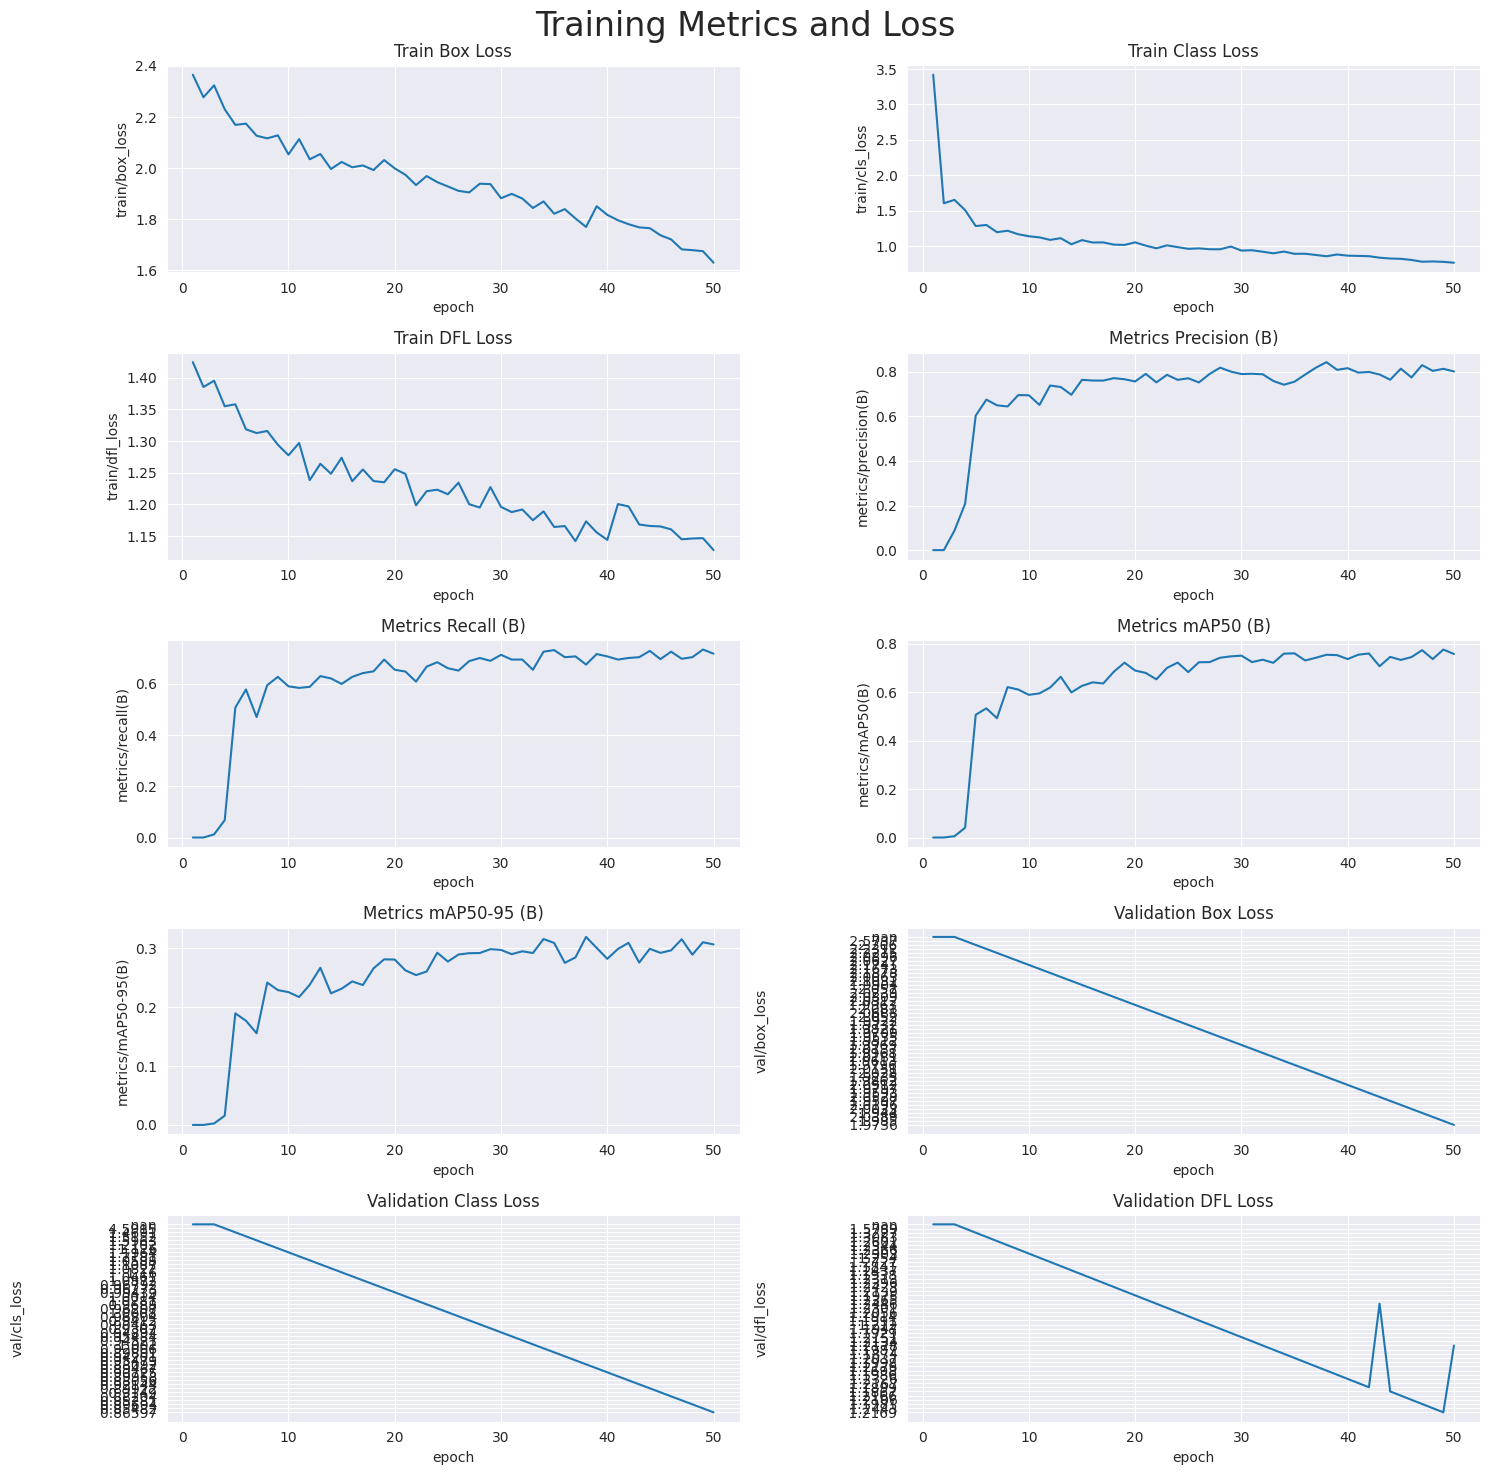

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/test/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1546.41it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


                   all        123        224      0.831      0.705      0.806        0.4
Speed: 0.9ms preprocess, 46.1ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/val


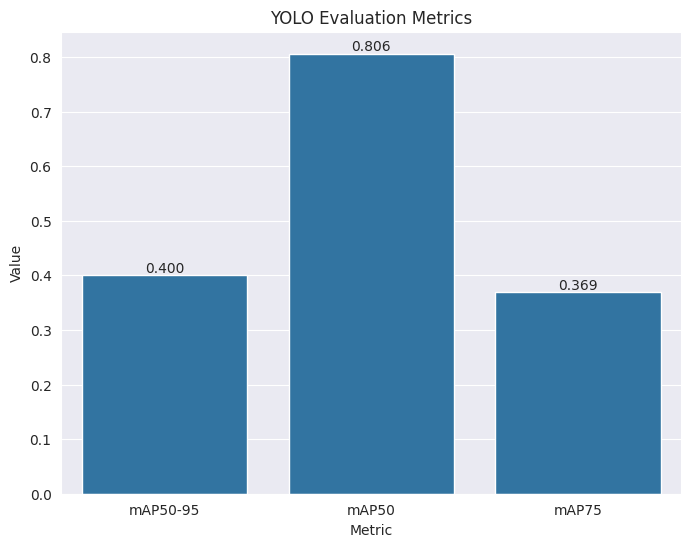

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

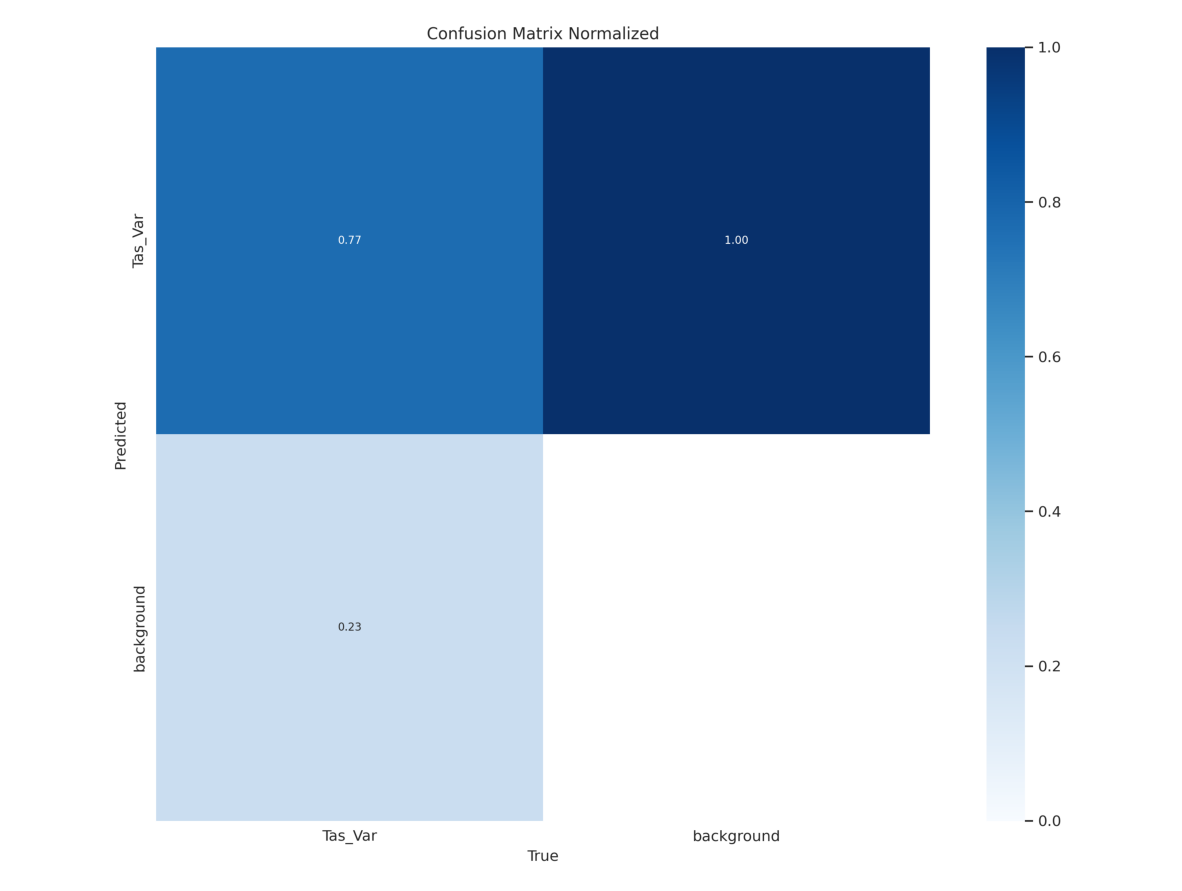

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/train/confusion_matrix_normalized.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
# Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 544x640 2 Tas_Vars, 130.1ms
Speed: 4.8ms preprocess, 130.1ms inference, 2.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 56.9ms
Speed: 3.7ms preprocess, 56.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 56.9ms
Speed: 3.1ms preprocess, 56.9ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 48.0ms
Speed: 3.3ms preprocess, 48.0ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 45.4ms
Speed: 2.9ms preprocess, 45.4ms inference, 2.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 46.8ms
Speed: 3.2ms preprocess, 46.8ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 46.2ms
Speed: 5.5ms preprocess, 46.2ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 45.1ms
Speed: 2.9ms preprocess, 45.1ms inference, 2.3ms postprocess per image at s

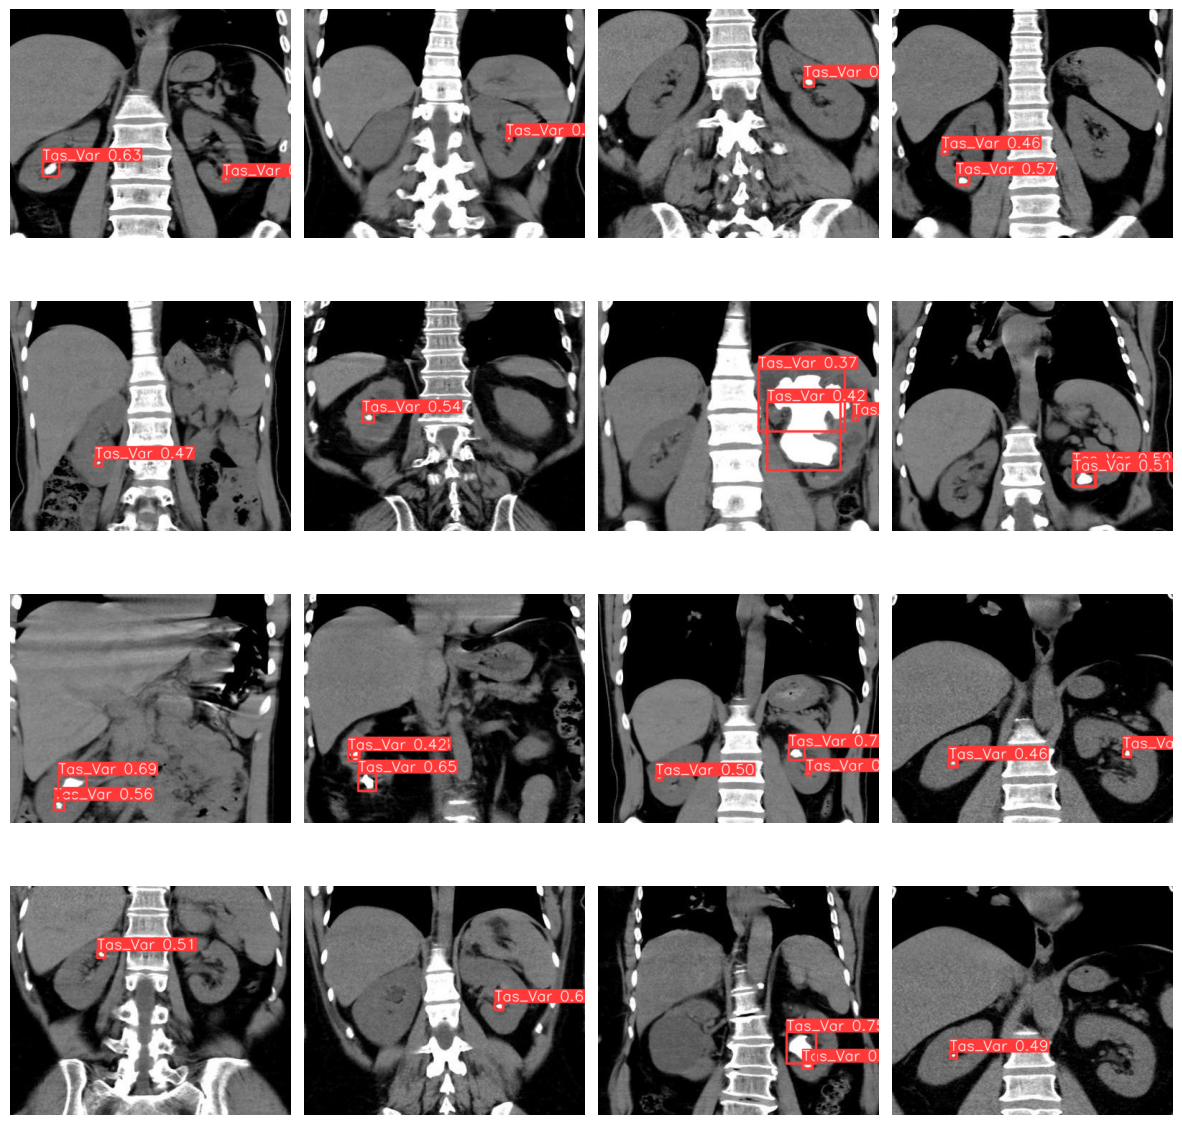

In [ ]:
# Define the directory where the custom images are stored
custom_image_dir = '/content/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)